In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import mplscience
import os 

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 


['default', 'despine']


In [2]:
output_dir = "."

In [36]:
df0 = pd.read_csv("joint_pca_lsi_scores_forward.csv", index_col="Unnamed: 0")
df0.rename(columns={"0": "PCA_LSI"}, inplace=True)
df0["type"] = "forward"

In [37]:
df1 = pd.read_csv("multivi_scores_forward.csv", index_col="Unnamed: 0")
df1.rename(columns={"0": "Multi_VI"}, inplace=True)
df1["type"] = "forward"

In [38]:
df2 = pd.read_csv("multivi_bc_scores_forward.csv", index_col="Unnamed: 0")
df2.rename(columns={"0": "Multi_VI_bc"}, inplace=True)
df2["type"] = "forward"

In [39]:
df3 = pd.read_csv("scores_pca_forward.csv", index_col="Unnamed: 0")
df3.rename(columns={"0": "PCA"}, inplace=True)
df3["type"] = "forward"

In [40]:
df4 = pd.read_csv("scores_scvi_forward.csv", index_col="Unnamed: 0")
df4.rename(columns={"0": "scVI"}, inplace=True)
df4["type"] = "forward"

In [41]:
df5 = pd.read_csv("scores_scvi_bc_forward.csv", index_col="Unnamed: 0")
df5.rename(columns={"0": "scVI_bc"}, inplace=True)
df5["type"] = "forward"

In [42]:
df6 = pd.read_csv("lsi_scores_forward.csv", index_col="Unnamed: 0")
df6.rename(columns={"0": "LSI"}, inplace=True)
df6["type"] = "forward"

In [43]:
df7 = pd.read_csv("patac_scores_forward.csv", index_col="Unnamed: 0")
df7.rename(columns={"0": "pATAC"}, inplace=True)
df7["type"] = "forward"

In [44]:
df8 = pd.read_csv("patac_bc_scores_forward.csv", index_col="Unnamed: 0")
df8.rename(columns={"0": "pATAC_bc"}, inplace=True)
df8["type"] = "forward"

In [45]:
df9 = pd.read_csv("joint_pca_lsi_scores_self.csv", index_col="Unnamed: 0")
df9.rename(columns={"0": "PCA_LSI"}, inplace=True)
df9["type"] = "self"

In [46]:
df10 = pd.read_csv("multivi_scores_self.csv", index_col="Unnamed: 0")
df10.rename(columns={"0": "Multi_VI"}, inplace=True)
df10["type"] = "self"

In [47]:
df11 = pd.read_csv("multivi_bc_scores_self.csv", index_col="Unnamed: 0")
df11.rename(columns={"0": "Multi_VI_bc"}, inplace=True)
df11["type"] = "self"

In [48]:
df12 = pd.read_csv("scores_pca_self.csv", index_col="Unnamed: 0")
df12.rename(columns={"0": "PCA"}, inplace=True)
df12["type"] = "self"

In [49]:
df13 = pd.read_csv("scores_scvi_self.csv", index_col="Unnamed: 0")
df13.rename(columns={"0": "scVI"}, inplace=True)
df13["type"] = "self"

In [50]:
df14 = pd.read_csv("scores_scvi_bc_self.csv", index_col="Unnamed: 0")
df14.rename(columns={"0": "scVI_bc"}, inplace=True)
df14["type"] = "self"

In [51]:
df15 = pd.read_csv("lsi_scores_self.csv", index_col="Unnamed: 0")
df15.rename(columns={"0": "LSI"}, inplace=True)
df15["type"] = "self"

In [52]:
df16 = pd.read_csv("patac_scores_self.csv", index_col="Unnamed: 0")
df16.rename(columns={"0": "pATAC"}, inplace=True)
df16["type"] = "self"

In [53]:
df17 = pd.read_csv("patac_bc_scores_self.csv", index_col="Unnamed: 0")
df17.rename(columns={"0": "pATAC_bc"}, inplace=True)
df17["type"] = "self"

In [54]:
dfs = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]

In [55]:
df = pd.concat(dfs, axis=1)

In [57]:
df["index"] = df.index

In [58]:
df["epsilon"] = df.apply(lambda x: float(x["index"].split(",")[0][1:]), axis=1)

In [59]:
df["tau_a"] = df.apply(lambda x: float(x["index"].split(",")[1]), axis=1)

In [60]:
df["tau_b"] = df.apply(lambda x: float(x["index"].split(",")[2][:-1]), axis=1)

In [66]:
df

,PCA_LSI,type,Multi_VI,type,Multi_VI_bc,type,PCA,type,scVI,type,...,LSI,type,pATAC,type,pATAC_bc,type,index,epsilon,tau_a,tau_b
"(0.0001, 1, 1)",0.297663,forward,0.342353,forward,0.331165,forward,0.391215,forward,0.313086,forward,...,0.640188,self,0.514427,self,0.511976,self,"(0.0001, 1, 1)",0.0001,1.00,1.00
"(0.0001, 1, 0.99)",0.088669,forward,0.089644,forward,0.156906,forward,0.094102,forward,0.100220,forward,...,0.735623,self,0.637039,self,0.658586,self,"(0.0001, 1, 0.99)",0.0001,1.00,0.99
"(0.0001, 1, 0.95)",0.080564,forward,0.075507,forward,0.149788,forward,0.076704,forward,0.089406,forward,...,0.744804,self,0.636011,self,0.667116,self,"(0.0001, 1, 0.95)",0.0001,1.00,0.95
"(0.0001, 1, 0.9)",0.079438,forward,0.074320,forward,0.149426,forward,0.074545,forward,0.087294,forward,...,0.745243,self,0.633727,self,0.667521,self,"(0.0001, 1, 0.9)",0.0001,1.00,0.90
"(0.0001, 0.99, 1)",0.190625,forward,0.189719,forward,0.202044,forward,0.176538,forward,0.205165,forward,...,0.745082,self,0.636961,self,0.660824,self,"(0.0001, 0.99, 1)",0.0001,0.99,1.00
"(0.0001, 0.99, 0.99)",0.082631,forward,0.087992,forward,0.175240,forward,0.103357,forward,0.108031,forward,...,0.828157,self,0.659355,self,0.683048,self,"(0.0001, 0.99, 0.99)",0.0001,0.99,0.99
"(0.0001, 0.99, 0.95)",0.065940,forward,0.069865,forward,0.164499,forward,0.080856,forward,0.102258,forward,...,0.844657,self,0.661239,self,0.694961,self,"(0.0001, 0.99, 0.95)",0.0001,0.99,0.95
"(0.0001, 0.99, 0.9)",0.063161,forward,0.068459,forward,0.162995,forward,0.078214,forward,0.102274,forward,...,0.847145,self,0.661984,self,0.698496,self,"(0.0001, 0.99, 0.9)",0.0001,0.99,0.90
"(0.0001, 0.95, 1)",0.183548,forward,0.187159,forward,0.195242,forward,0.174314,forward,0.205163,forward,...,0.755589,self,0.641298,self,0.671741,self,"(0.0001, 0.95, 1)",0.0001,0.95,1.00
"(0.0001, 0.95, 0.99)",0.075065,forward,0.079883,forward,0.182686,forward,0.106919,forward,0.126471,forward,...,0.863150,self,0.661463,self,0.688499,self,"(0.0001, 0.95, 0.99)",0.0001,0.95,0.99


In [64]:
df_melted = df.melt(id_vars = ["index", "epsilon", "tau_a", "tau_b"], value_vars = ["PCA_LSI", "Multi_VI", "Multi_VI_bc", "PCA", "scVI", "scVI_bc", "LSI", "pATAC", "pATAC_bc"])

In [65]:
df_melted.head()

,index,epsilon,tau_a,tau_b,variable,value
0,"(0.0001, 1, 1)",0.0001,1.00,1.00,PCA_LSI,0.297663
1,"(0.0001, 1, 0.99)",0.0001,1.00,0.99,PCA_LSI,0.088669
2,"(0.0001, 1, 0.95)",0.0001,1.00,0.95,PCA_LSI,0.080564
3,"(0.0001, 1, 0.9)",0.0001,1.00,0.90,PCA_LSI,0.079438
4,"(0.0001, 0.99, 1)",0.0001,0.99,1.00,PCA_LSI,0.190625


In [78]:
df_melted = df_melted.groupby(by=["index", "epsilon", "tau_a", "tau_b", "variable"], as_index=False).mean()

In [79]:
def create_modality_col(x):
    if x["variable"] in ["PCA_LSI", "Multi_VI", "Multi_VI_bc"]:
        return "GEX+ATAC"
    if x["variable"] in ["PCA", "scVI", "scVI_bc"]:
        return "GEX"
    if x["variable"] in ["LSI", "pATAC", "pATAC_bc"]:
        return "ATAC"
    raise ValueError("not found")

df_melted["modality"] = df_melted.apply(create_modality_col, axis=1)

In [80]:
df_filtered_1 = df_melted[df_melted["epsilon"] ==0.0001]

In [81]:
labels_dict_1 = {
    "PCA_LSI": "PCA, LSI",
    "Multi_VI": "MultiVI",
    "Multi_VI_bc": "MultiVI bc",
    "PCA": "PCA",
    "scVI": "scVI",
    "scVI_bc": "scVI bc",
    "LSI": "LSI",
    "pATAC": "pATAC",
    "pATAC_bc": "pATAC bc"
}

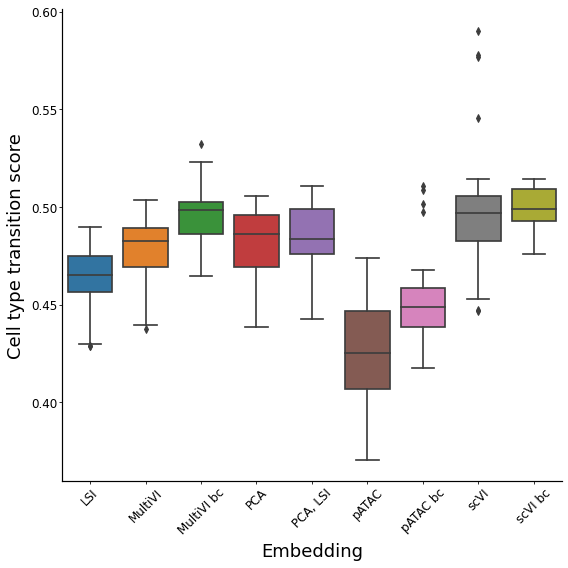

In [82]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

sns.boxplot(df_melted, x = "variable", y="value")
plt.xticks(rotation=45)

_labels = [item.get_text() for item in axs.get_xticklabels()]

labels = [*map(labels_dict_1.get, _labels)]
axs.set_xticklabels(labels)

plt.legend([],[], frameon=False)
axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Embedding', fontsize=18)
plt.tight_layout()

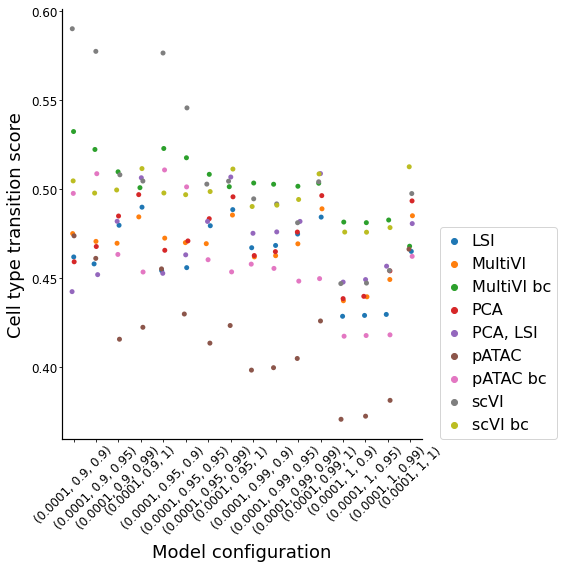

In [83]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

ax = sns.stripplot(data=df_filtered_1, x="index", y="value", hue="variable", jitter=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

handles, _labels = axs.get_legend_handles_labels()
labels = [*map(labels_dict_1.get, _labels)]
axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Model configuration', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_eps_1e-4.png"), dpi=300)

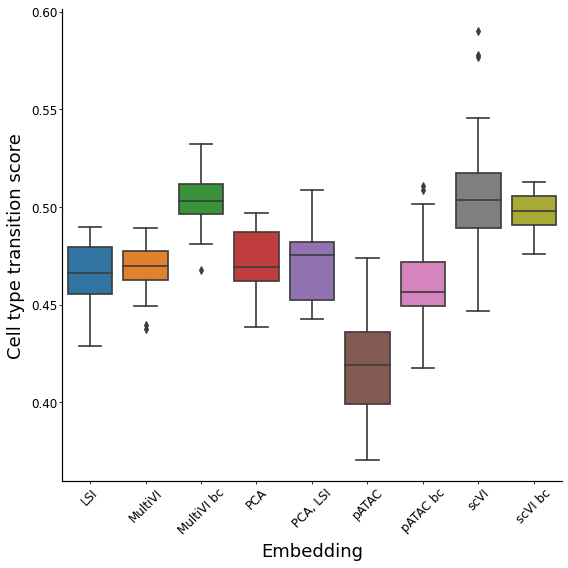

In [84]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

sns.boxplot(df_filtered_1, x = "variable", y="value")
plt.xticks(rotation=45)

_labels = [item.get_text() for item in axs.get_xticklabels()]

labels = [*map(labels_dict_1.get, _labels)]
axs.set_xticklabels(labels)

plt.legend([],[], frameon=False)
axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Embedding', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_boxplot_eps_1e-4.png"), dpi=300)


In [85]:
df_filtered_2 = df_melted[df_melted["epsilon"] ==0.001]

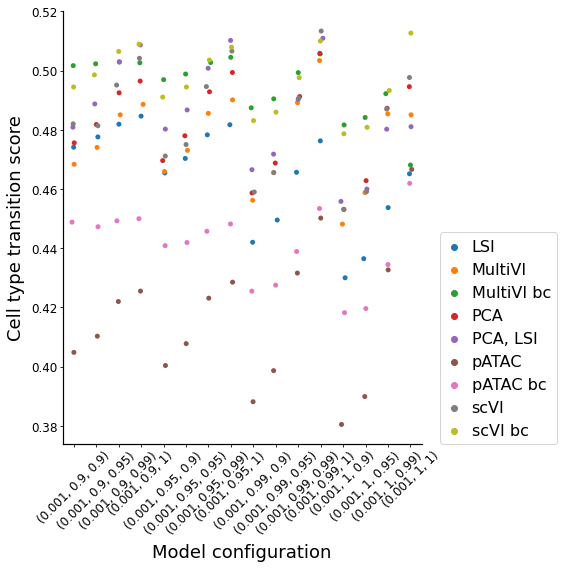

In [86]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

ax = sns.stripplot(data=df_filtered_2, x="index", y="value", hue="variable", jitter=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

handles, _labels = axs.get_legend_handles_labels()
labels = [*map(labels_dict_1.get, _labels)]
axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Model configuration', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_eps_1e-3.png"), dpi=300)

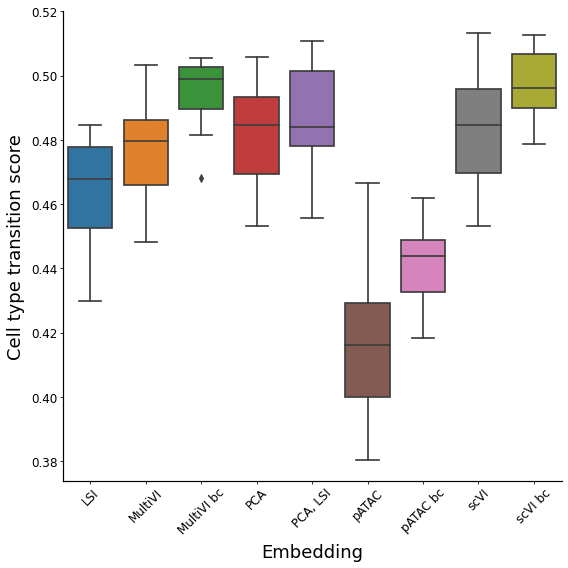

In [87]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

sns.boxplot(df_filtered_2, x = "variable", y="value")
plt.xticks(rotation=45)

_labels = [item.get_text() for item in axs.get_xticklabels()]

labels = [*map(labels_dict_1.get, _labels)]
axs.set_xticklabels(labels)

plt.legend([],[], frameon=False)
axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Embedding', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_boxplot_eps_1e-3.png"), dpi=300)

In [88]:
df_filtered_3 = df_melted[df_melted["epsilon"] ==0.01]

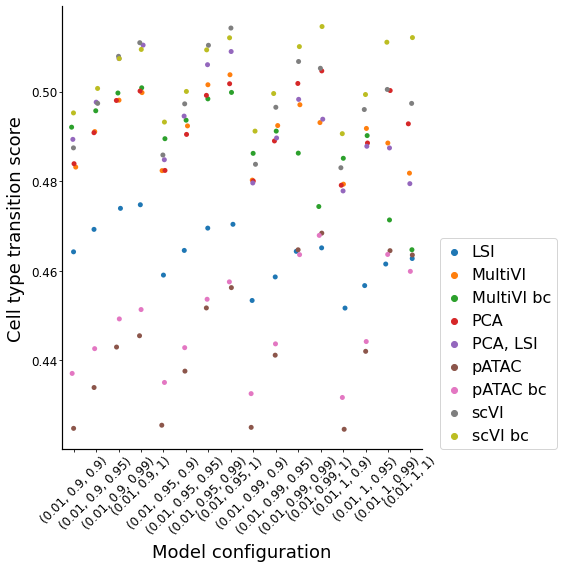

In [89]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

ax = sns.stripplot(data=df_filtered_3, x="index", y="value", hue="variable", jitter=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

handles, _labels = axs.get_legend_handles_labels()
labels = [*map(labels_dict_1.get, _labels)]
axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Model configuration', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_eps_1e-2.png"), dpi=300)

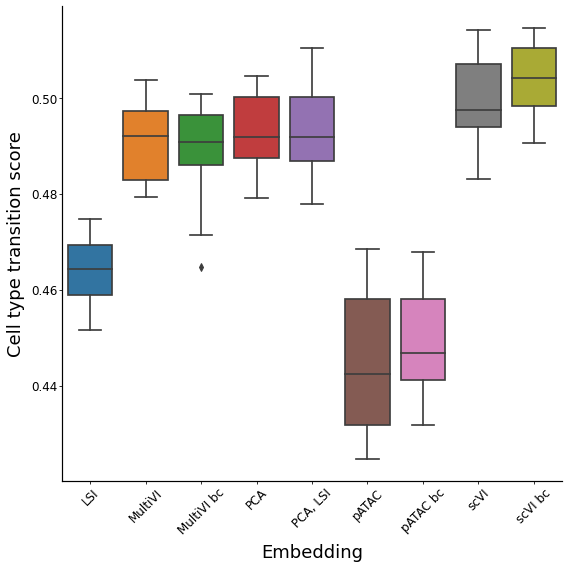

In [90]:
fig, axs = plt.subplots(1,1, figsize=(8,8))

sns.boxplot(df_filtered_3, x = "variable", y="value")
plt.xticks(rotation=45)

_labels = [item.get_text() for item in axs.get_xticklabels()]

labels = [*map(labels_dict_1.get, _labels)]
axs.set_xticklabels(labels)

plt.legend([],[], frameon=False)
axs.set_ylabel('Cell type transition score', fontsize=18)

axs.set_xlabel('Embedding', fontsize=18)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "model_performance_boxplot_eps_1e-2.png"), dpi=300)